# Advanced Python Data Analysis and Visualization
    
This notebook demonstrates advanced techniques for data analysis and visualization using Python libraries such as `pandas`, `matplotlib`, and `seaborn`. Additionally, it generates a summary report in both Word and Excel formats.

### Dataset
We will be using a sample dataset from the `seaborn` library, which contains information about tips received by a waiter based on various factors.


In [1]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the 'tips' dataset from seaborn
tips = sns.load_dataset('tips')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Data Cleaning and Exploration
    
1. **Handling Missing Data**: Check for any missing values and handle them accordingly.
2. **Descriptive Statistics**: Provide summary statistics of the dataset.


In [2]:

# Check for missing data
missing_data = tips.isnull().sum()
missing_data


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [3]:

# Summary statistics
summary_stats = tips.describe()
summary_stats


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Data Visualization

### 1. Correlation Heatmap
A heatmap to visualize the correlation between numeric features in the dataset.


In [4]:
# Import the required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the sample dataset 'tips' from seaborn
df = sns.load_dataset('tips')

# Display the first few rows to understand the data structure
print(df.head())

# Select only the numeric columns for correlation
df = df.select_dtypes(include=['number'])


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


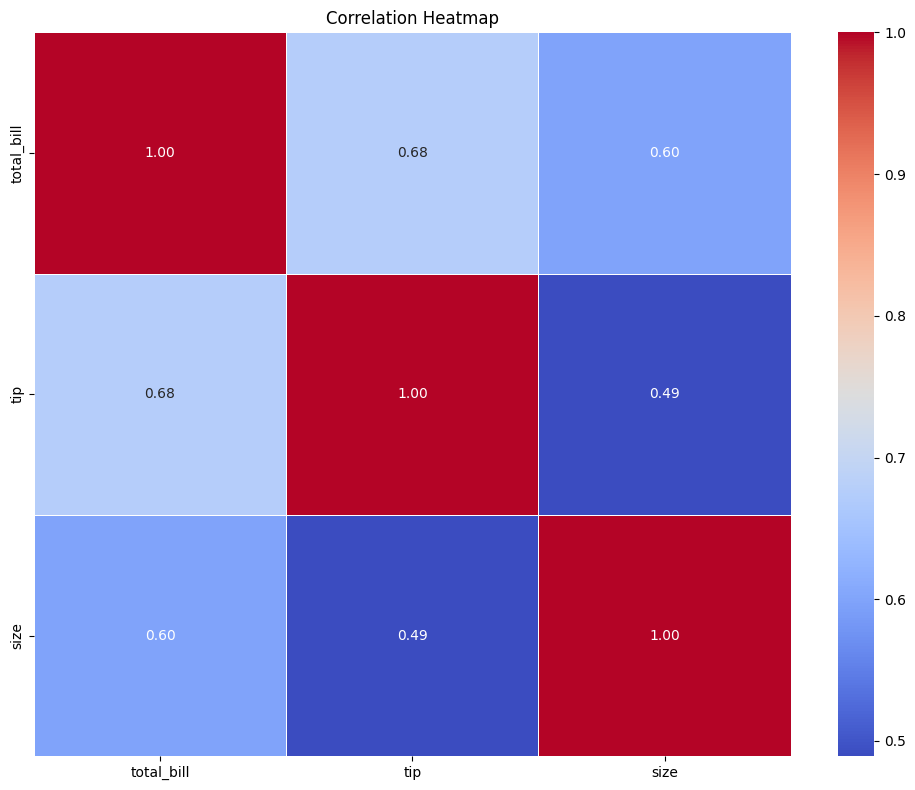

In [5]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the numeric data
# You can replace this with the actual dataset you're using
# Example: df = pd.read_csv('your_data.csv')

# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))  # Set the figure size for the heatmap
correlation_matrix = df.corr()  # Calculate the correlation matrix

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and adjust layout
plt.title('Correlation Heatmap')
plt.tight_layout()

# Show the plot
plt.show()


## Analysis of the Heatmap:

### Diagonal (1.0 values):
The diagonal values (from top-left to bottom-right) are all 1.0 because each variable is perfectly correlated with itself.

### `total_bill` and `tip` (0.68):
The correlation between `total_bill` and `tip` is 0.68, indicating a strong positive relationship. This makes sense: as the total bill increases, tips generally increase as well.

### `total_bill` and `size` (0.60):
The correlation between `total_bill` and `size` is 0.60, also a positive correlation. Larger parties tend to have higher bills.

### `tip` and `size` (0.49):
The correlation between `tip` and `size` is 0.49, which is a moderate positive correlation. Larger parties tend to leave higher tips, although the relationship is weaker than the one between `total_bill` and `tip`.


### 2. Boxplot of Tips by Day

A boxplot to show the distribution of tips based on the day of the week.


/var/folders/pc/70j03fnd1d30cqzx292t2vmh0000gn/T/ipykernel_37656/3882136805.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='tip', data=tips, palette='Set2')


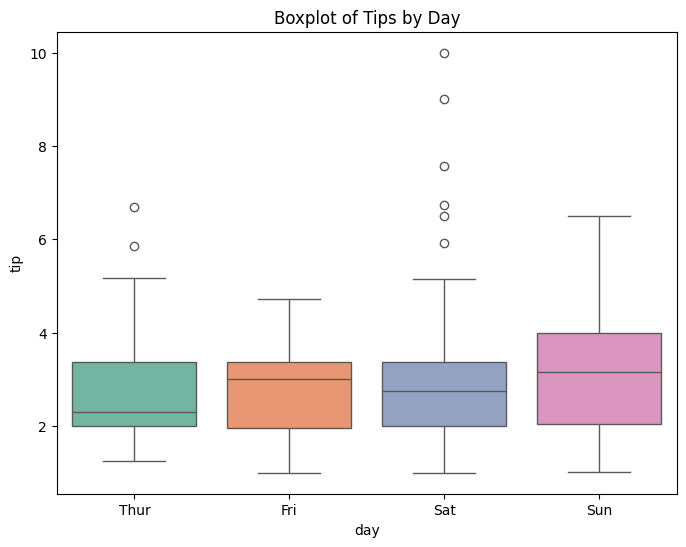

In [6]:

# Boxplot of tips by day
plt.figure(figsize=(8, 6))
sns.boxplot(x='day', y='tip', data=tips, palette='Set2')
plt.title('Boxplot of Tips by Day')
plt.show()


## Key Elements of the Boxplot:

### Boxes (Interquartile Range - IQR):
The central box represents the interquartile range (IQR), which is the range between the first quartile (25th percentile) and the third quartile (75th percentile).  
The line inside the box represents the **median** (50th percentile) tip for each day.

### Whiskers:
The "whiskers" extend from the box to show the range of the data, typically 1.5 times the IQR from the quartiles.  
Any points outside of this range are considered **outliers** and are plotted as individual points.

### Outliers:
The circles above the whiskers represent **outliers** — unusually high tip values that are more than 1.5 times the IQR away from the rest of the data.

---

## Analysis by Day:

### Thursday (Thur):
- Median tip is around $2.
- The IQR is smaller compared to other days, meaning less variability in tips.
- A few high outliers are present.

### Friday (Fri):
- Median tip is around $2.5.
- The spread of the data (IQR) is slightly wider compared to Thursday.
- Similar to Thursday, there are a few outliers, but not as many as on Saturday.

### Saturday (Sat):
- Median tip is around $2.5, similar to Friday.
- There’s a larger number of **outliers** on Saturday, indicating that some customers left much higher tips on this day.
- The IQR range is similar to Friday.

### Sunday (Sun):
- Median tip is noticeably higher, around $3, indicating that tips are generally larger on Sunday compared to other days.
- The IQR is the largest on Sunday, suggesting the most variability in tip amounts.
- There are fewer outliers compared to Saturday, but tips generally reach higher amounts.


### 3. Scatter Plot with Regression Line

A scatter plot to show the relationship between total bill and tip amount, with a regression line.


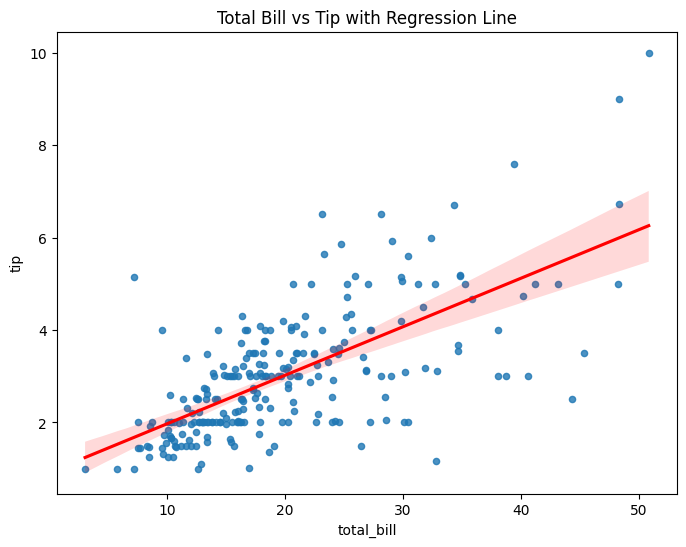

In [7]:

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='total_bill', y='tip', data=tips, scatter_kws={'s':20}, line_kws={'color':'red'})
plt.title('Total Bill vs Tip with Regression Line')
plt.show()


## Key Components of the Plot:

### Scatter Points:
- Each blue dot represents a single data point where the x-coordinate is the **total bill** and the y-coordinate is the **tip** for that transaction.
- The points are scattered along the chart, showing how the tip varies with different total bill amounts.

### Regression Line (Red Line):
- The red line represents a **linear regression fit** of the data, showing the general trend in the relationship between the total bill and the tip.
- The positive slope of the line indicates that there is a **positive relationship** between the total bill and the tip — as the total bill increases, the tip generally increases.

### Shaded Area (Confidence Interval):
- The shaded red area around the regression line represents the **confidence interval** for the linear regression model.
- This band shows the uncertainty of the regression line fit; the wider the band, the more uncertainty there is in predicting the exact relationship.

---

## Analysis:

- **Positive Correlation**: The plot clearly shows a positive correlation between the total bill and tip. As the total bill increases, tips also tend to increase, though the data shows a lot of variation.
  
- **Outliers**: There are a few data points where very high tips are given for certain bills, particularly noticeable around the highest total bill values (e.g., total bill of $50 and a tip of $10).

- **Spread of Data**: The scatter points show that tips vary widely for smaller total bills (below $20), while for larger bills, tips are more consistently higher.


## Report Generation

The following cells will generate a summary report in both Word and Excel formats, including data statistics and visualizations.


/var/folders/pc/70j03fnd1d30cqzx292t2vmh0000gn/T/ipykernel_37656/2473678933.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='tip', data=tips, palette='Set2')


Word report generated successfully.
Excel report generated successfully.


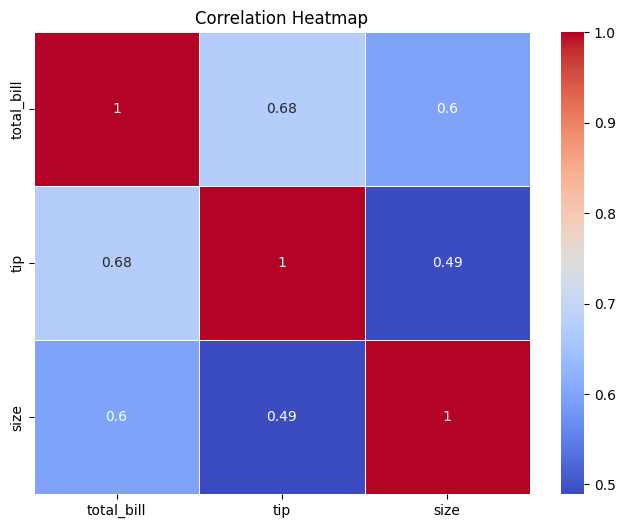

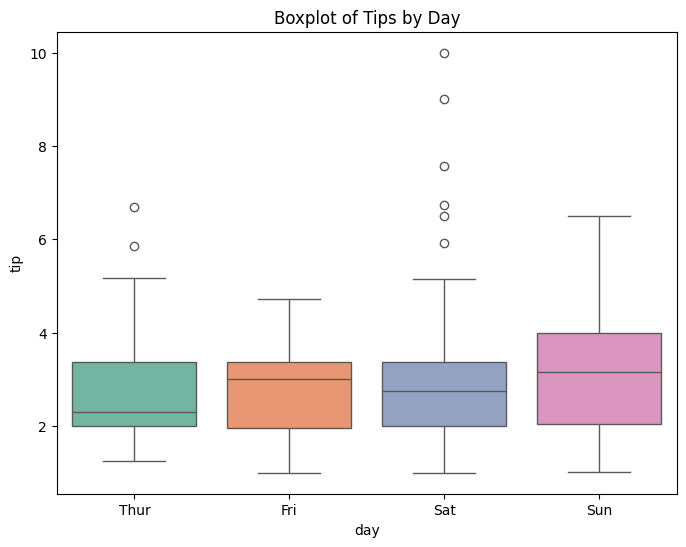

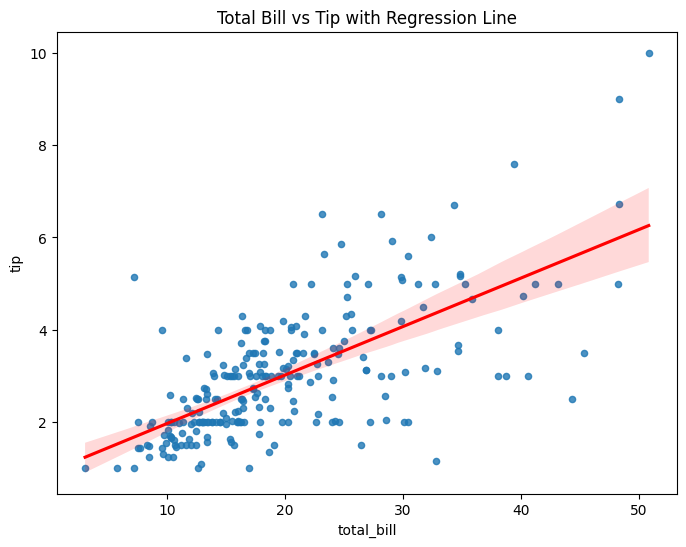

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from docx import Document  # Import for generating Word documents

# Load the 'tips' dataset from Seaborn
tips = sns.load_dataset('tips')

# Example of defining the missing variables
summary_stats = tips.describe()  # Get summary statistics of the dataset
missing_data = tips.isnull().sum()  # Get the count of missing data in each column

# Function to generate a Word report
def generate_word_report(summary, missing_data, visualizations):
    doc = Document()
    
    # Title
    doc.add_heading('Data Analysis Report', 0)

    # Summary statistics
    doc.add_heading('Summary Statistics', level=1)
    doc.add_paragraph(str(summary))

    # Missing data
    doc.add_heading('Missing Data', level=1)
    doc.add_paragraph(str(missing_data))

    # Add visualizations to the Word document
    doc.add_heading('Visualizations', level=1)
    for viz_path in visualizations:
        doc.add_picture(viz_path, width=5000000, height=3000000)

    # Save the Word document
    doc.save("data/data_analysis_report.docx")
    print("Word report generated successfully.")

# Function to generate an Excel report
def generate_excel_report(df):
    with pd.ExcelWriter("data/data_analysis_report.xlsx") as writer:
        # Write the original data
        df.to_excel(writer, sheet_name='Data', index=False)
        
        # Write summary statistics
        df.describe().to_excel(writer, sheet_name='Summary Statistics')
        
        # Write missing data report
        missing_data_df = pd.DataFrame(missing_data, columns=['Missing Data'])
        missing_data_df.to_excel(writer, sheet_name='Missing Data')
        
    print("Excel report generated successfully.")

# Save visualizations as images
visualizations = []
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
heatmap_path = "data/heatmap.png"
plt.savefig(heatmap_path)
visualizations.append(heatmap_path)

plt.figure(figsize=(8, 6))
sns.boxplot(x='day', y='tip', data=tips, palette='Set2')
plt.title('Boxplot of Tips by Day')
boxplot_path = "data/boxplot.png"
plt.savefig(boxplot_path)
visualizations.append(boxplot_path)

plt.figure(figsize=(8, 6))
sns.regplot(x='total_bill', y='tip', data=tips, scatter_kws={'s':20}, line_kws={'color':'red'})
plt.title('Total Bill vs Tip with Regression Line')
regplot_path = "data/regplot.png"
plt.savefig(regplot_path)
visualizations.append(regplot_path)

# Generate Word and Excel reports
generate_word_report(summary_stats, missing_data, visualizations)
generate_excel_report(tips)


# Formatting Values
The Styler distinguishes the display value from the actual value, in both data values and index or columns headers. To control the display value, the text is printed in each cell as a string, and we can use the .format() and .format_index() methods to manipulate this according to a format spec string or a callable that takes a single value and returns a string. It is possible to define this for the whole table, or index, or for individual columns, or MultiIndex levels. We can also overwrite index names.

Additionally, the format function has a precision argument to specifically help format floats, as well as decimal and thousands separators to support other locales, an na_rep argument to display missing data, and an escape and hyperlinks arguments to help displaying safe-HTML or safe-LaTeX. The default formatter is configured to adopt pandas’ global options such as styler.format.precision option, controllable using with pd.option_context('format.precision', 2):

In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl

df = pd.DataFrame({
    "strings": ["Adam", "Mike"],
    "ints": [1, 3],
    "floats": [1.123, 1000.23]
})

In [12]:
df.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(["row 1", "row 2"], axis=0)

,STRINGS,INTS,FLOATS
row 1,Adam,1,"1,123"
row 2,Mike,3,"1.000,230"


In [13]:
weather_df = pd.DataFrame(np.random.rand(10,2)*5,
                          index=pd.date_range(start="2021-01-01", periods=10),
                          columns=["Tokyo", "Beijing"])

def rain_condition(v):
    if v < 1.75:
        return "Dry"
    elif v < 2.75:
        return "Rain"
    return "Heavy Rain"

def make_pretty(styler):
    styler.set_caption("Weather Conditions")
    styler.format(rain_condition)
    styler.format_index(lambda v: v.strftime("%A"))
    styler.background_gradient(axis=None, vmin=1, vmax=5, cmap="YlGnBu")
    return styler

weather_df

,Tokyo,Beijing
2021-01-01,2.821824,3.677003
2021-01-02,2.863615,1.397730
2021-01-03,3.679756,0.330908
2021-01-04,2.599236,0.213897
2021-01-05,2.106538,4.121194
2021-01-06,2.043129,3.460399
2021-01-07,0.157878,2.681423
2021-01-08,3.508930,4.769383
2021-01-09,1.794262,4.628264
2021-01-10,2.795782,2.770856


In [14]:
weather_df.loc["2021-01-04":"2021-01-08"].style.pipe(make_pretty)

,Tokyo,Beijing
Monday,Rain,Dry
Tuesday,Rain,Heavy Rain
Wednesday,Rain,Heavy Rain
Thursday,Dry,Rain
Friday,Heavy Rain,Heavy Rain


# Hiding Data
The index and column headers can be completely hidden, as well subselecting rows or columns that one wishes to exclude. Both these options are performed using the same methods.

The index can be hidden from rendering by calling .hide() without any arguments, which might be useful if your index is integer based. Similarly column headers can be hidden by calling .hide(axis=”columns”) without any further arguments.

Specific rows or columns can be hidden from rendering by calling the same .hide() method and passing in a row/column label, a list-like or a slice of row/column labels to for the subset argument.

Hiding does not change the integer arrangement of CSS classes, e.g. hiding the first two columns of a DataFrame means the column class indexing will still start at col2, since col0 and col1 are simply ignored.

In [15]:
df = pd.DataFrame(np.random.randn(5, 5))
df.style \
  .hide(subset=[0, 2, 4], axis=0) \
  .hide(subset=[0, 2, 4], axis=1)


,1,3
1,-2.210423,0.068937
3,0.276119,-0.722377


In [ ]:
show = [0, 2, 4]
df.style \
  .hide([row for row in df.index if row not in show], axis=0) \
  .hide([col for col in df.columns if col not in show], axis=1)